<a href="https://colab.research.google.com/github/namoshi/chiral/blob/master/chiral_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chiral Test Program (First data)

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

%matplotlib inline


Using TensorFlow backend.


In [3]:
# chiral データの読み込み
chiral = pd.read_csv('https://raw.githubusercontent.com/namoshi/chiral/master/AI_2-chiral(Exp_The).csv')

# データの最初の部分の表示
chiral.head()


,Table No.,ICSD No.,Space Group,Struct.formula,Unnamed: 4,元素1,元素1数,族1,周期1,Unnamed: 9,元素2,元素2数,族2,周期2,晶系,Unnamed: 15,Unnamed: 16
0,76,62259,P 41,Cs3 P7,Cs3,Cs,3.00,1,6,P7,P,7.0,15,3,Tetragonal,NaN,NaN
1,76,88519,P 41,B5 H9,B5,B,5.00,13,2,H9,H,9.0,1,1,Tetragonal,NaN,NaN
2,76,406486,P 41,Cs4 Ge9,Cs4,Cs,4.00,1,6,Ge9,Ge,9.0,14,4,Tetragonal,NaN,NaN
3,76,174242,P 41,Sc0.96 B15,Sc0.96,Sc,0.96,3,4,B15,B,15.0,13,2,Tetragonal,NaN,NaN
4,76,422423,P 41,Sc B15,Sc,Sc,1.00,3,4,B15,B,15.0,13,2,Tetragonal,NaN,NaN


In [4]:
# achiral データの読み込み
achiral = pd.read_csv('https://raw.githubusercontent.com/namoshi/chiral/master/AI_2-achiral.csv')

# データの最初の部分の表示
achiral.head()

,Table No.,ICSD No.,Space Group,Struct.formula,Unnamed: 4,元素1,元素1数,族1,周期1,Unnamed: 9,元素2,元素2数,族2,周期2,晶系,Unnamed: 15,Unnamed: 16
0,2,109,P -1,Te I,Te,Te,1.0,16,5,I,I,1.0,17,5,Triclinic,NaN,NaN
1,2,193,P -1,Ca As3,Ca,Ca,1.0,2,4,As3,As,3.0,15,4,Triclinic,NaN,NaN
2,2,197,P -1,V7 O13,V7,V,7.0,5,4,O13,O,13.0,16,2,Triclinic,NaN,NaN
3,2,1501,P -1,V O2,V,V,1.0,5,4,O2,O,2.0,16,2,Triclinic,NaN,NaN
4,2,2380,P -1,Nb S3,Nb,Nb,1.0,5,5,S3,S,3.0,16,3,Triclinic,NaN,NaN


In [0]:
X_chiral = chiral[['族1', '族2']]
y_chiral = np.ones((len(X_chiral)))

#print(X_chiral)
#print(y_chiral)

X_achiral = achiral[['族1', '族2']]
y_achiral = np.zeros((len(X_achiral)))

#print(X_achiral)
#print(y_achiral)

In [6]:
X = np.concatenate((X_chiral, X_achiral), axis=0)
y = np.concatenate((y_chiral, y_achiral), axis=0)
print('X=', X)
print('y=', y)

# Binary representation of the variables
a_categorical = np_utils.to_categorical(X[:,0]-1)
print('A=', a_categorical)


b_categorical = np_utils.to_categorical(X[:,1]-1)

print('B=', b_categorical)

#print(np.sum(b_categorical, axis=0))

# concatenate a_categorical and b_categorical
abxy = np.c_[a_categorical, b_categorical]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,3]/X[:,2]]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,2:3]]

print('AB=', abxy)

#print(np.sum(abxy, axis=0))


X= [[ 1 15]
 [13  1]
 [ 1 14]
 ...
 [ 1 14]
 [14 16]
 [ 8 14]]
y= [1. 1. 1. ... 0. 0. 0.]
A= [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
B= [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
AB= [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


全サンプルにロジスティック回帰を適用

Logistic Regression for Categorical Data (using all samples)
Recognition Rates =  0.9735358980641999
Intercept is  -4.029759093856185
Coeffs are
-0.197756855833735
-0.02898942205894155
-2.1348400623266826
-0.3286126872239168
0.27227292567831246
-0.2850897955224269
0.5032815551029376
0.4058325465626457
0.3786286344053526
-0.4992161566087388
-0.42556275890013645
1.2462418706507297
0.11582233052530451
0.4128537861939652
-1.1527774309292063
1.30765925284886
0.5773555871381957
-0.16807915116951952
-0.8417531295570783
-1.2161659426350504
-1.8987938607928785
-0.38674462106905466
-1.3251585614616865
-1.0382557069286353
0.38298727606959326
0.6986559367906253
0.7742845570838827
-0.31512159812588536
0.7939144434631785
1.3035705994804692
0.8846014088193003
1.6541253920234391
-0.5849130514234406
0.9963824697608497
0.4140194513199403
-0.29661089428462717


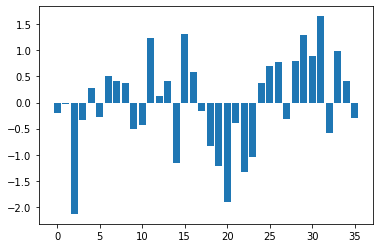

In [7]:
# logistic regression for categorical A and B
logreg = linear_model.LogisticRegression()

logreg.fit(abxy, y)

pred = logreg.predict(abxy)

#print('pred=', pred)

score = logreg.score(abxy, y)

print('Logistic Regression for Categorical Data (using all samples)')
print('Recognition Rates = ', score)

coeffs = logreg.coef_[0]
intercept = logreg.intercept_[0]

#print('Coeffs is ', coeffs)
print('Intercept is ', intercept)
print('Coeffs are')
for i in range(0, len(coeffs)):
    print(coeffs[i])

ix = range(0, len(coeffs))
plt.bar(ix, coeffs)
plt.show()
